In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [328]:
df = pd.read_csv("D:\projects\seoul bike sharing demand prediction\data\SeoulBikeData.csv", encoding= "unicode_escape")

In [329]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [330]:
df.shape

(8760, 14)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [332]:
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [333]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [334]:
df["Date"] = pd.to_datetime(df["Date"], format='mixed')

In [335]:
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df['Weekday']= df['Date'].dt.day_name()

In [336]:
df.drop("Date", axis=1, inplace=True)

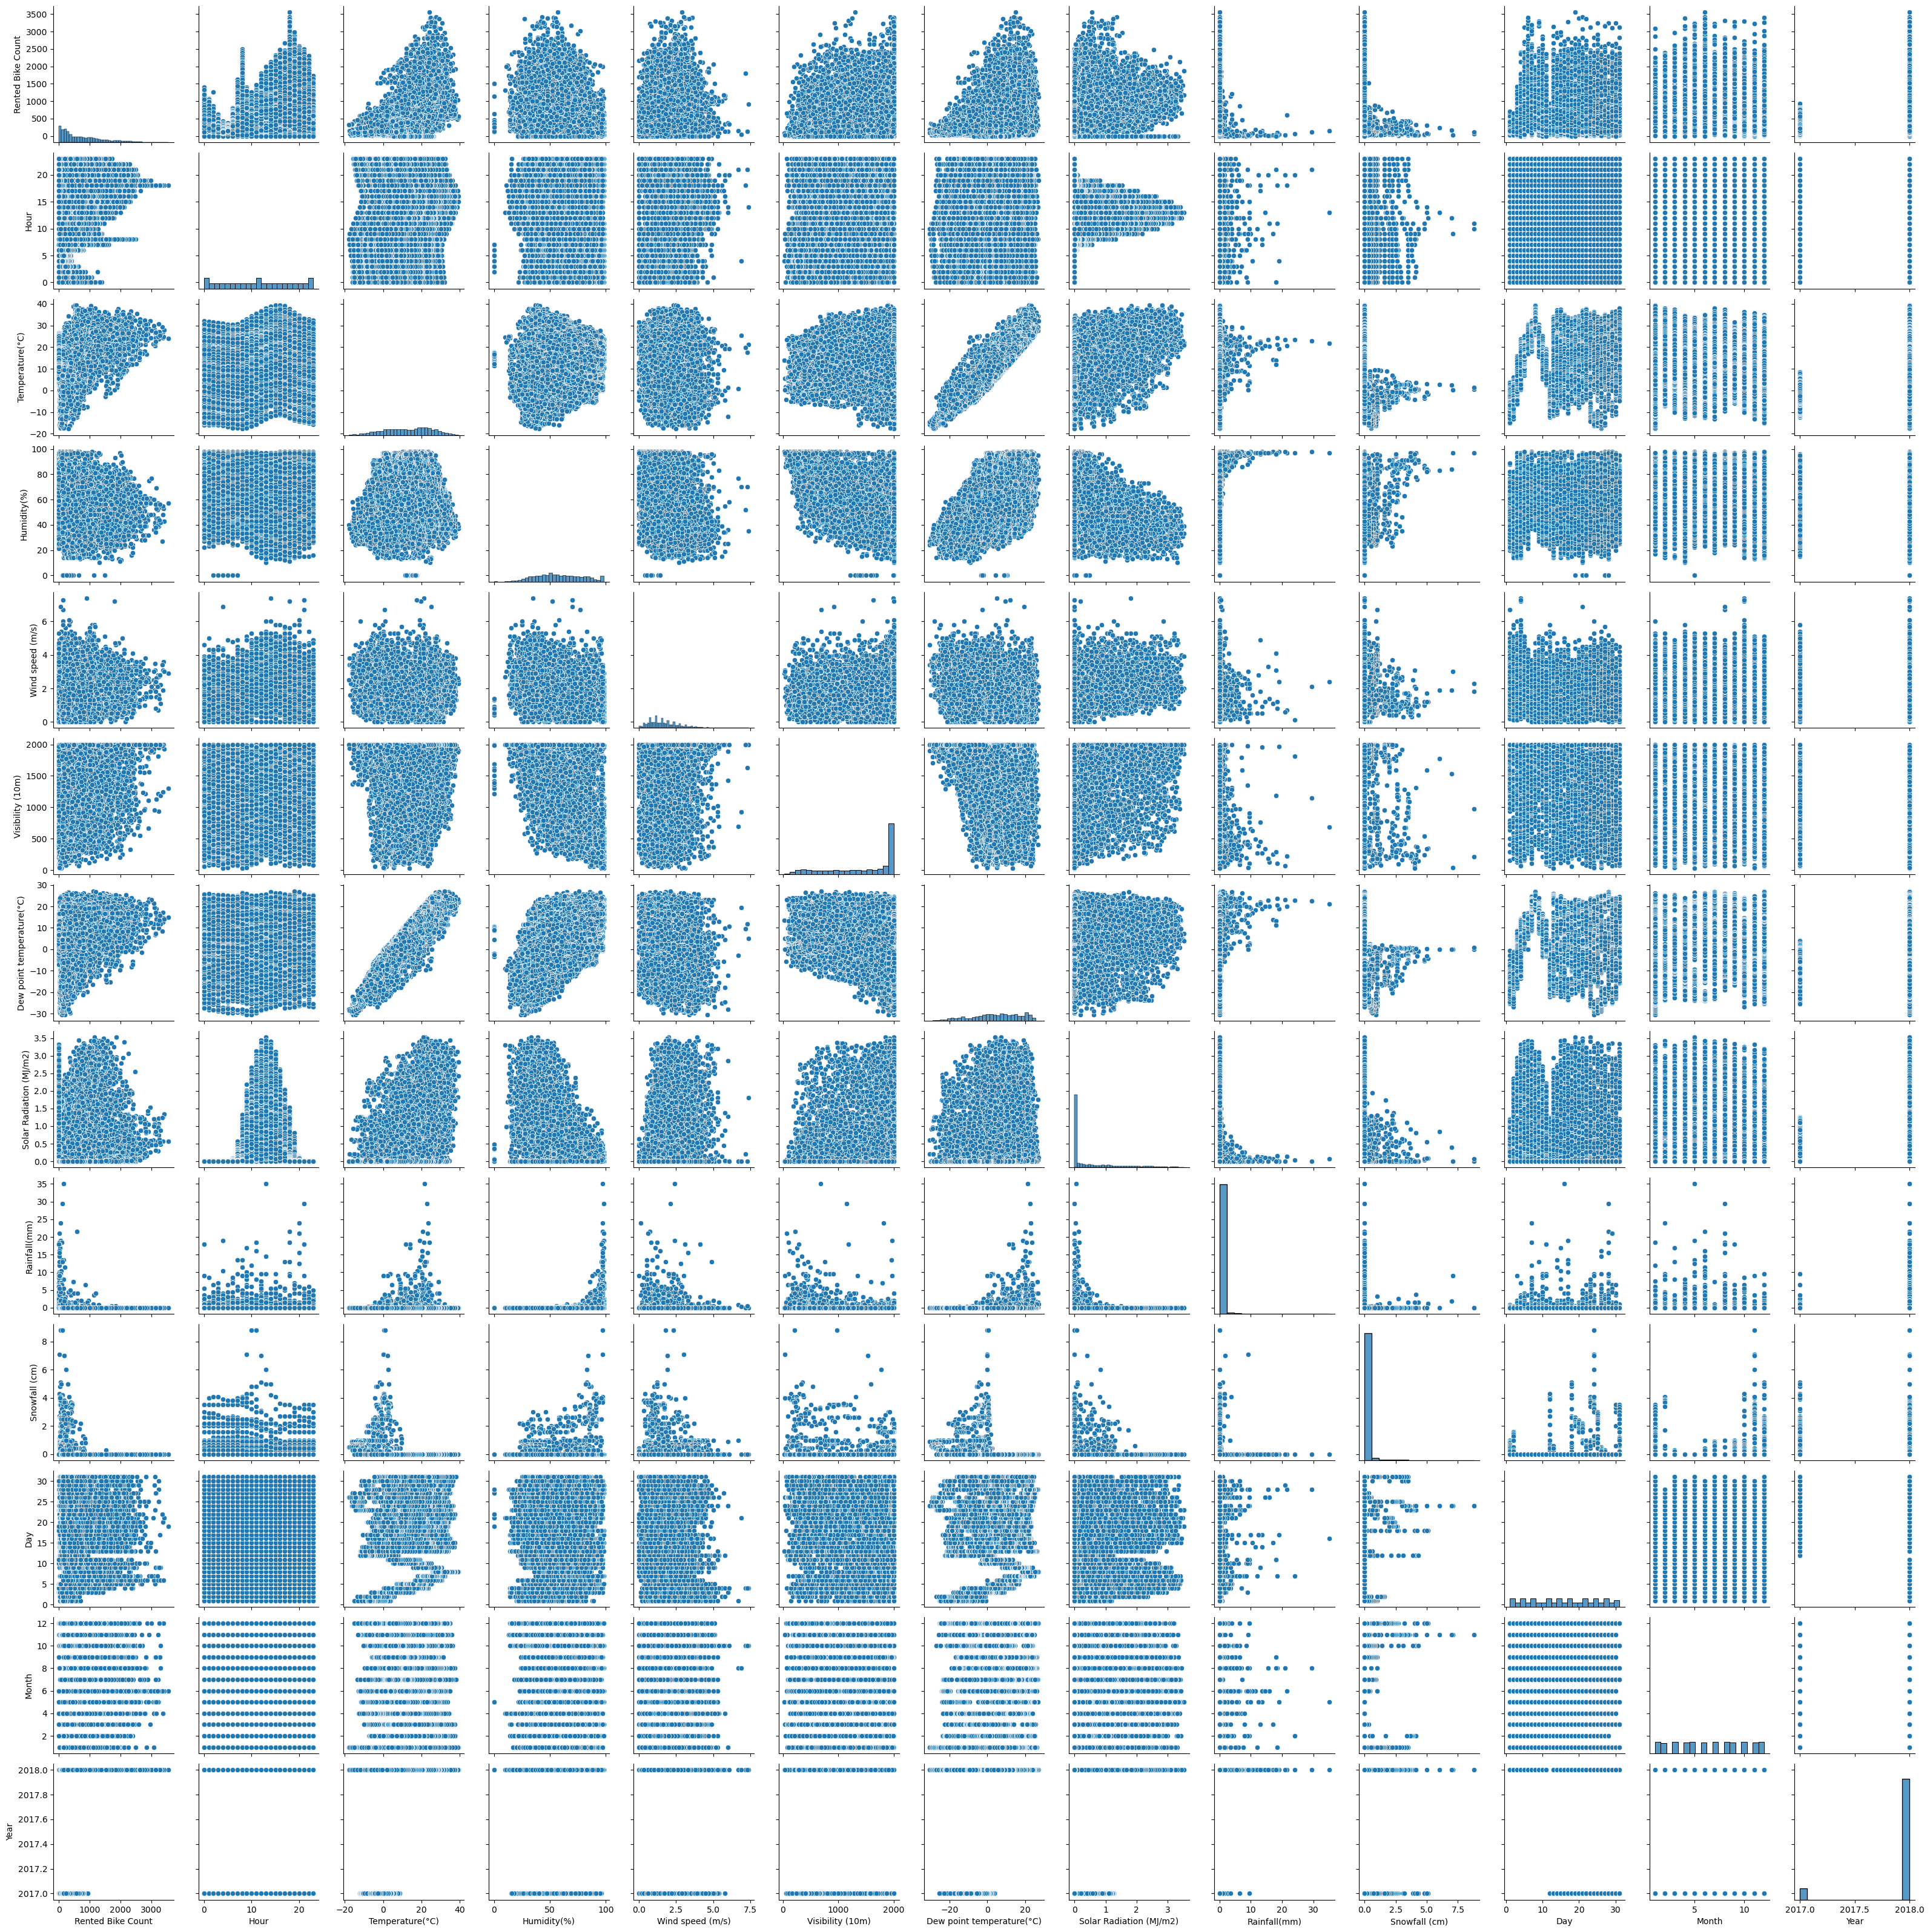

In [217]:
sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

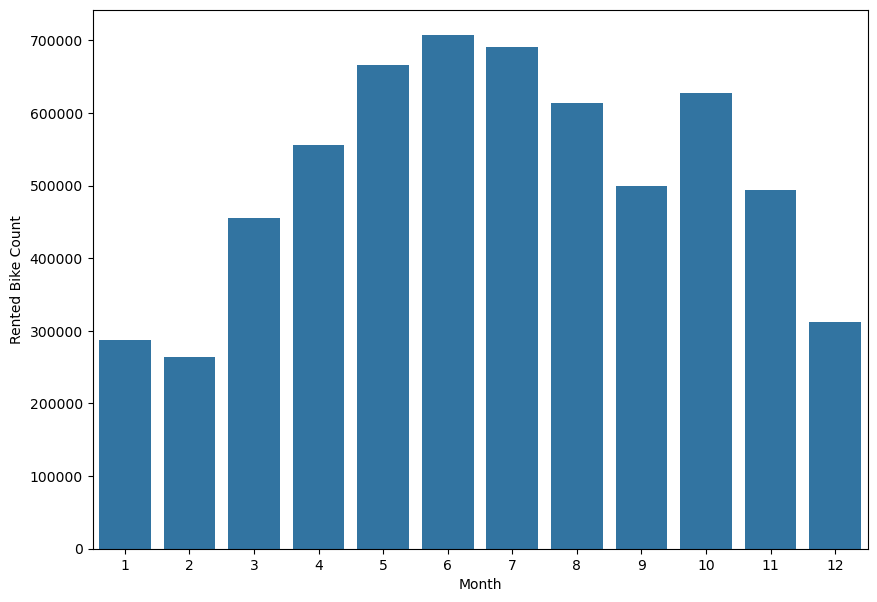

In [337]:
plt.figure(figsize=(10,7))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

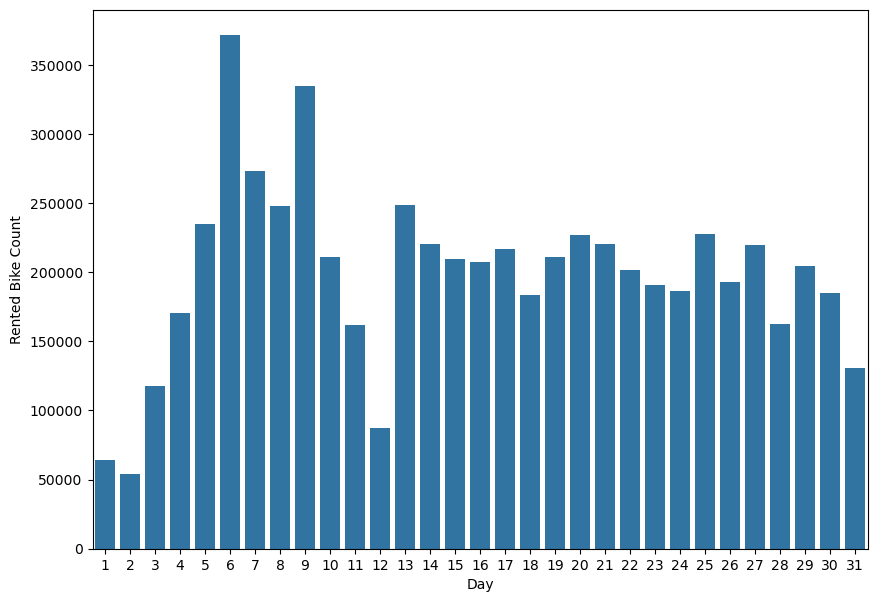

In [338]:
plt.figure(figsize=(10,7))
Day = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Day)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

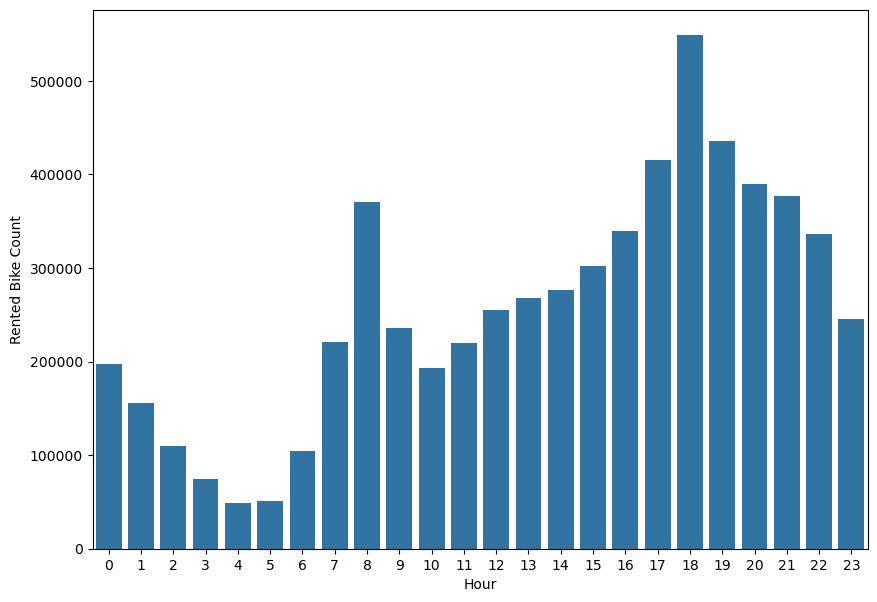

In [339]:
plt.figure(figsize=(10,7))
Hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data=Hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

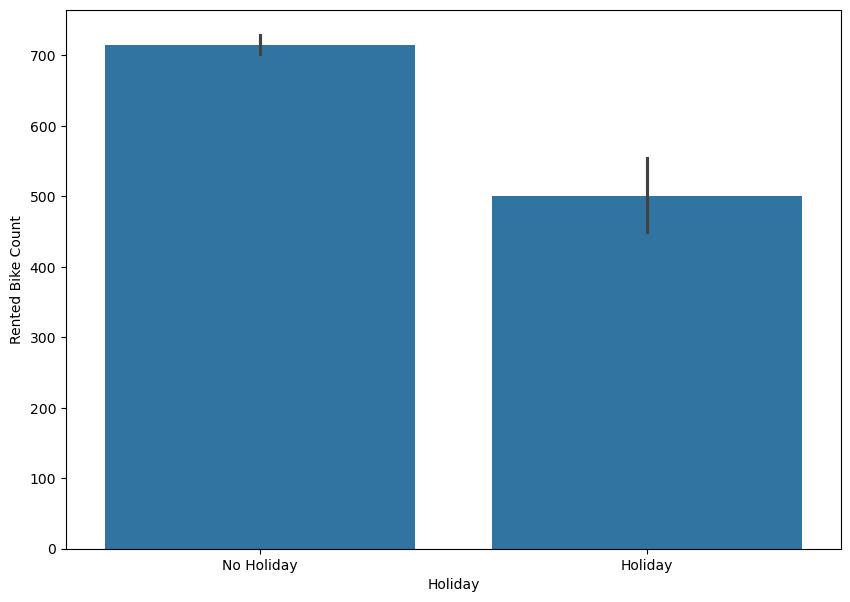

In [340]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday", y="Rented Bike Count", data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

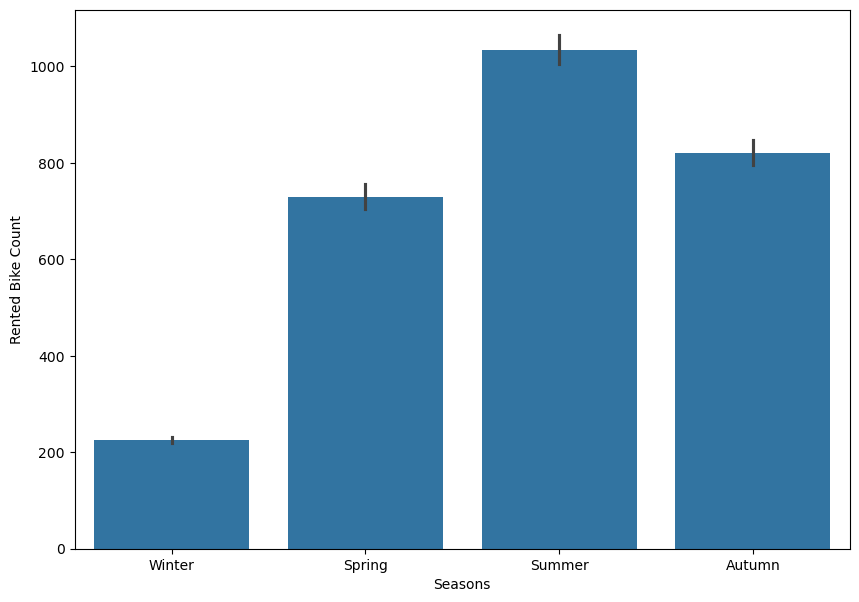

In [341]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons", y= "Rented Bike Count", data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

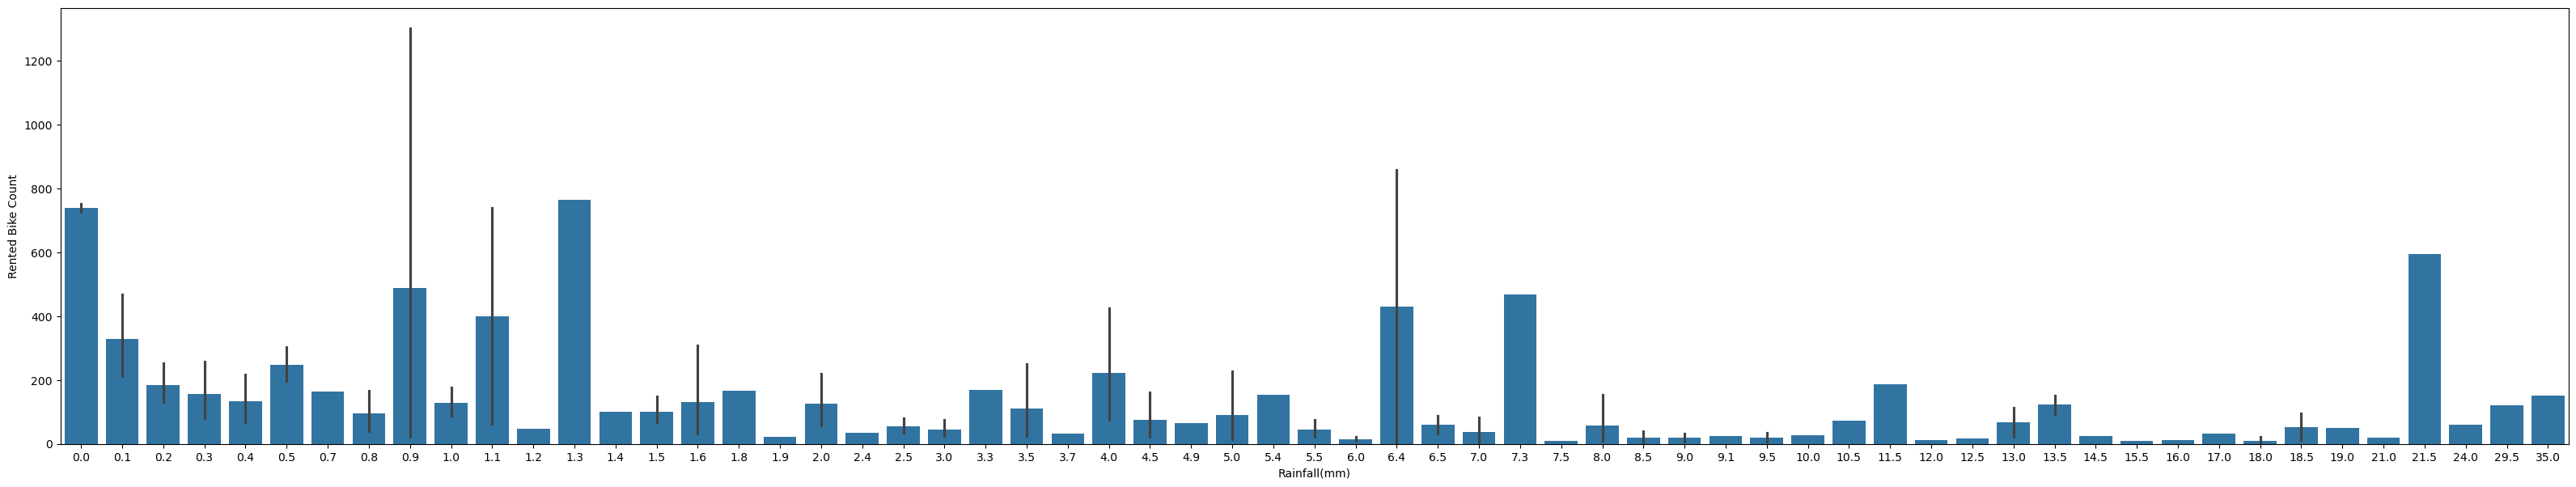

In [342]:
plt.figure(figsize=(40,7))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

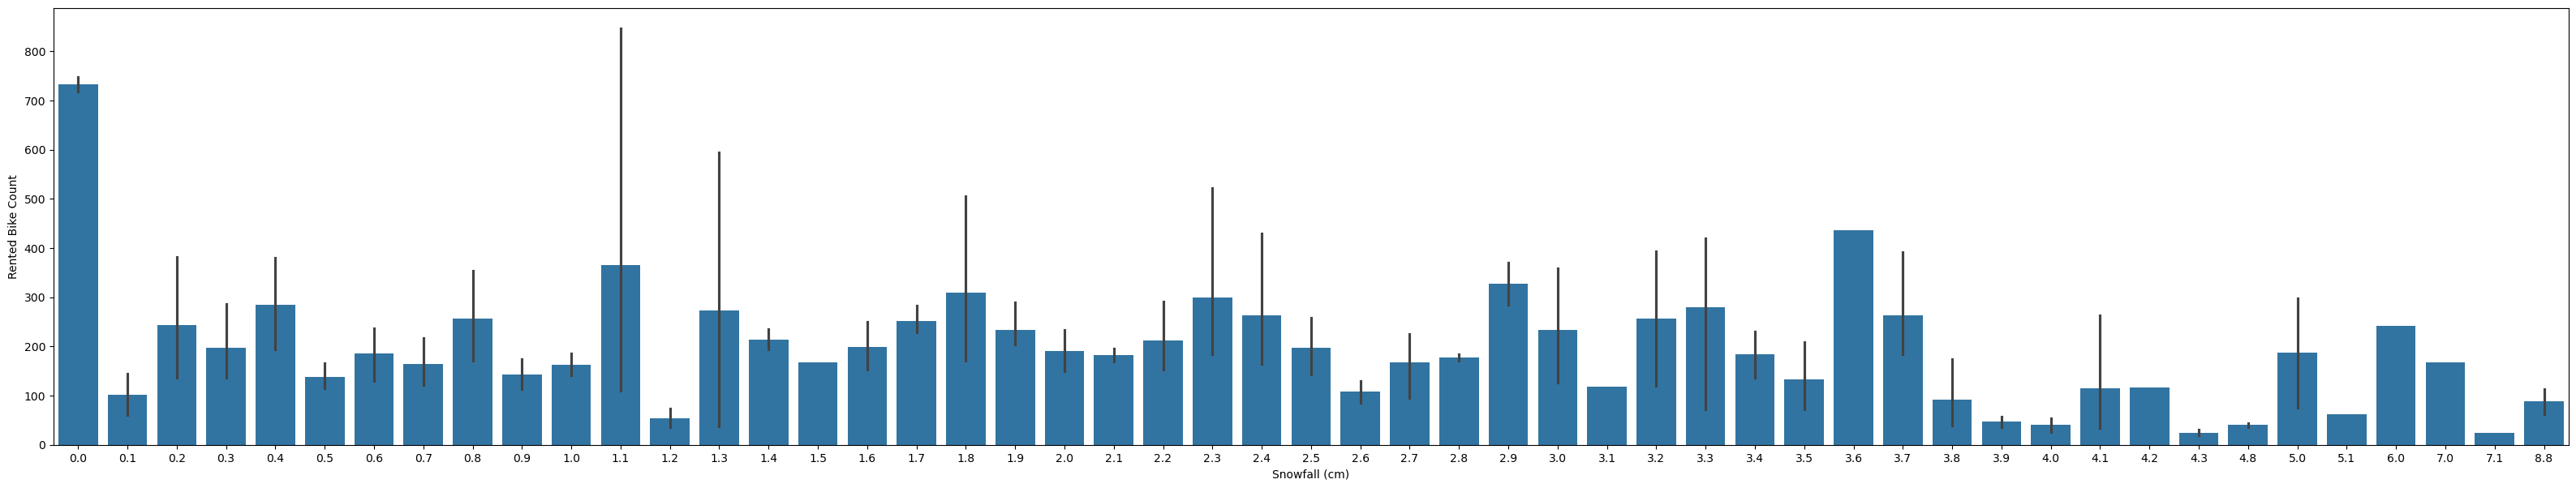

In [343]:
plt.figure(figsize=(40,7))
sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=df)

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

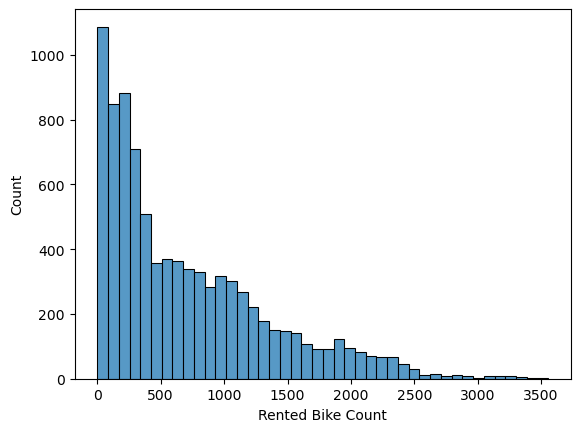

In [344]:
sns.histplot(df["Rented Bike Count"])

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

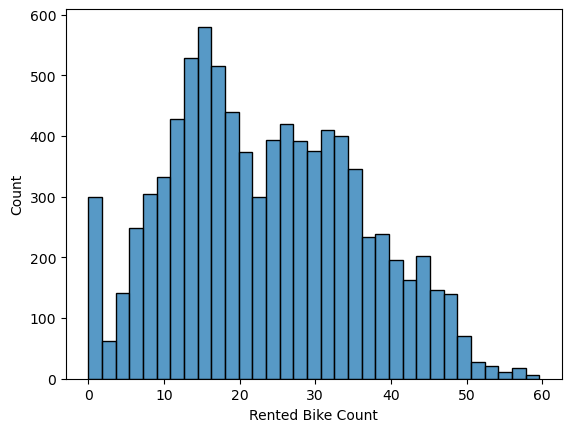

In [345]:
sns.histplot(np.sqrt(df["Rented Bike Count"]))

In [346]:
df.select_dtypes(include=['int', 'float']).skew().sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'Rented Bike Count'),
  Text(0, 1.5, 'Hour'),
  Text(0, 2.5, 'Temperature(°C)'),
  Text(0, 3.5, 'Humidity(%)'),
  Text(0, 4.5, 'Wind speed (m/s)'),
  Text(0, 5.5, 'Visibility (10m)'),
  Text(0, 6.5, 'Dew point temperature(°C)'),
  Text(0, 7.5, 'Solar Radiation (MJ/m2)'),
  Text(0, 8.5, 'Rainfall(mm)'),
  Text(0, 9.5, 'Snowfall (cm)'),
  Text(0, 10.5, 'Seasons'),
  Text(0, 11.5, 'Holiday'),
  Text(0, 12.5, 'Functioning Day'),
  Text(0, 13.5, 'Day'),
  Text(0, 14.5, 'Month'),
  Text(0, 15.5, 'Year'),
  Text(0, 16.5, 'Weekday')])

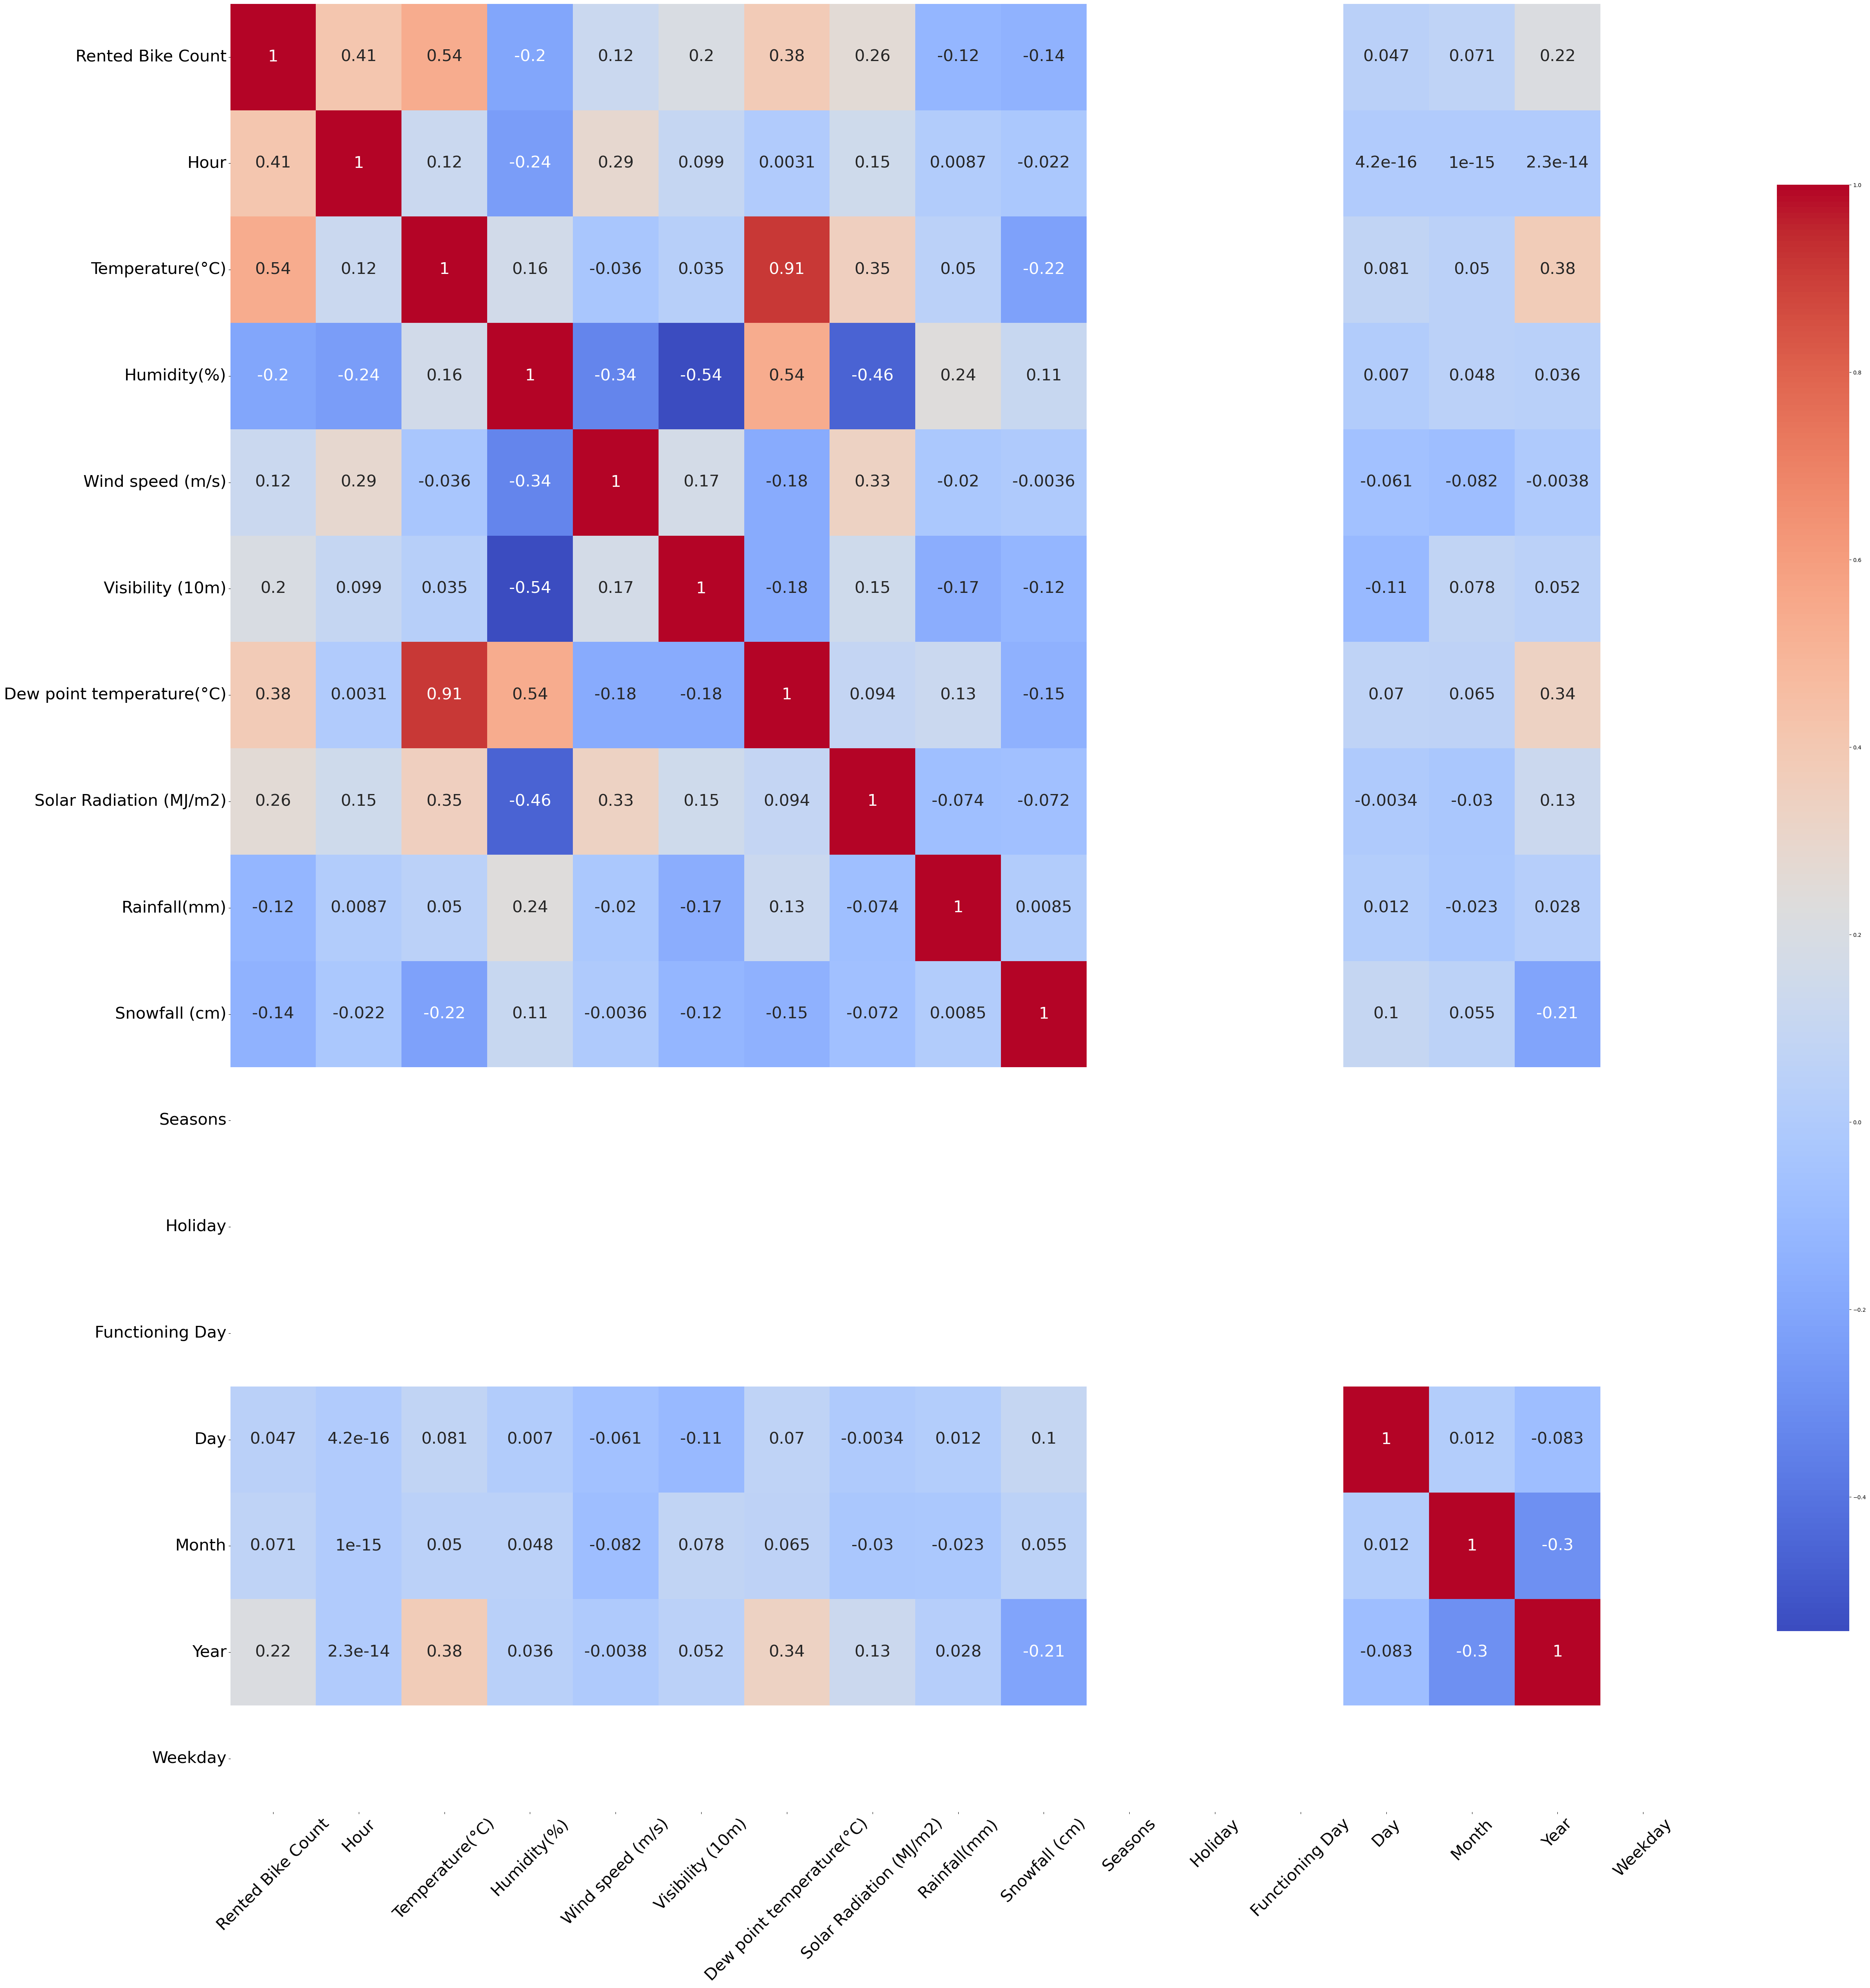

In [347]:
plt.figure(figsize=(60,60))
df1= df.apply(pd.to_numeric, errors= 'coerce')
sns.heatmap(df1.corr(), annot=True, annot_kws={"size": 30}, cbar_kws={"shrink": 0.8}, cmap="coolwarm")
plt.xticks(fontsize=30, rotation=45)  
plt.yticks(fontsize=30, rotation=0) 

In [348]:
# it shows that DEW_POINT_TEMPERATURE is showing high multicolinearity so we should drop it.

In [349]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)

In [350]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  Day  Month  Year   Weekday  
0  Winter  No Holiday             Yes   12      1  2017  Thursday  
1  Winter  No Holiday             Yes   12      1  2017  Thursday  
2  Winter  No Holiday             Yes   12      1  2017  Thursday  
3  Winter  No Holiday             Yes   12      1  2017  Thursday  
4  Winter  No Holiday             Yes   12      1  2017  Thursday

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Day                      8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Year                    

In [352]:
cat_features = ["Seasons", "Holiday", "Functioning Day", "Weekday"]

In [353]:
df["Functioning Day"].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [354]:
df["Holiday"]= df["Holiday"].map({"Holiday": 0, "No Holiday": 1}).astype(int)

In [355]:
df["Functioning Day"]= df["Functioning Day"].map({"Yes": 0, "No": 1}).astype(int)

In [360]:
df_season = pd.get_dummies(df["Seasons"], drop_first=True)
df_weekday = pd.get_dummies(df["Weekday"], drop_first=True)

In [361]:
df = pd.concat([df, df_season, df_weekday], axis=1)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int32  
 11  Functioning Day          8760 non-null   int32  
 12  Day                      8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Year                    

In [363]:
df.drop(["Seasons","Weekday"], axis=1, inplace=True)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int32  
 10  Functioning Day          8760 non-null   int32  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                  

In [365]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  ...  Year  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        1  ...  2017   False   False    True   False     False   False   
1        1  ...  2017   False   False    True   False     False   False   
2        1  ...  2017   False   False    True   False     False   False   
3        1  ...  2017   False   False    True   False     False   False   
4        1  ...  2017   False   False    True   False     False   False   

   Thursday  Tuesday  Wednesday  
0      True    False      False  
1      True    False      False  
2      True    False      False  
3      True    False      False  
4      True    False      False  

[5 rows x 23 columns]

In [366]:
df.shape

(8760, 23)

In [367]:
X = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [369]:
sc=  StandardScaler()

In [370]:
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test= sc.transform(X_test)

In [371]:
## Training ML Model
# Linear Regression Model

In [372]:
from sklearn.linear_model import LinearRegression

In [373]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [374]:
y_pred = lr.predict(X_test)

In [375]:
y_pred

array([ 978.24521382, 1161.14902976, 1311.63891508, ...,  973.88665564,
       -201.46376856, 1349.82169702])

In [376]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [377]:
MSE = mean_squared_error(y_pred,y_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_pred,y_test)
R2 = r2_score(y_pred,y_test)

In [378]:
print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 193512.99662765593
RMSE : 439.9011214212302
MAE : 330.88435776243995
R2 : 0.17420644818391573


In [379]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_pred,y_test)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_pred,y_test)
    R2 = r2_score(y_pred,y_test)

    print(f"{model_name} : ['MSE': {round(MSE, 3)}, 'RMSE': {round(RMSE, 3)}, 'MAE': {round(MAE, 3)}, 'R2': {round(R2, 3)}]")

In [380]:
get_metrics(y_test, y_pred, 'LinearRegression')

LinearRegression : ['MSE': 193512.997, 'RMSE': 439.901, 'MAE': 330.884, 'R2': 0.174]


In [381]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [382]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [383]:
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

xgr = XGBRegressor().fit(X_train, y_train)
y_pred_xgr = xgr.predict(X_test)

In [384]:
get_metrics(y_test, y_pred_rir, 'Ridge')
get_metrics(y_test, y_pred_lar, 'Lasso')
get_metrics(y_test, y_pred_poly, 'PolynomialFeatures')
get_metrics(y_test, y_pred_svr, 'SVR')
get_metrics(y_test, y_pred_knnr, 'KNeighborsRegressor')
get_metrics(y_test, y_pred_dtr, 'DecisionTreeRegressor')
get_metrics(y_test, y_pred_rfr, 'RandomForestRegressor')
get_metrics(y_test, y_pred_xgr, 'XGBRegressor')


Ridge : ['MSE': 193510.523, 'RMSE': 439.898, 'MAE': 330.875, 'R2': 0.174]
Lasso : ['MSE': 193300.12, 'RMSE': 439.659, 'MAE': 330.329, 'R2': 0.165]
PolynomialFeatures : ['MSE': 131642.249, 'RMSE': 362.825, 'MAE': 247.912, 'R2': 0.56]
SVR : ['MSE': 329832.053, 'RMSE': 574.31, 'MAE': 391.511, 'R2': -12.08]
KNeighborsRegressor : ['MSE': 122330.116, 'RMSE': 349.757, 'MAE': 221.428, 'R2': 0.604]
DecisionTreeRegressor : ['MSE': 85428.111, 'RMSE': 292.281, 'MAE': 165.747, 'R2': 0.78]
RandomForestRegressor : ['MSE': 46203.014, 'RMSE': 214.949, 'MAE': 126.493, 'R2': 0.868]
XGBRegressor : ['MSE': 36147.775, 'RMSE': 190.126, 'MAE': 118.585, 'R2': 0.906]


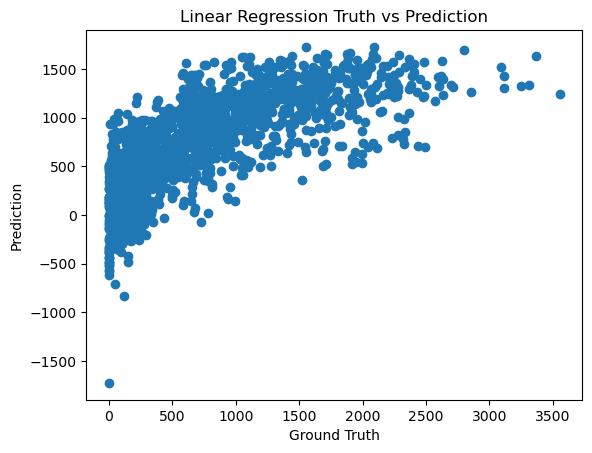

In [385]:
plt.scatter(y_test,y_pred)
plt.title("Linear Regression Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

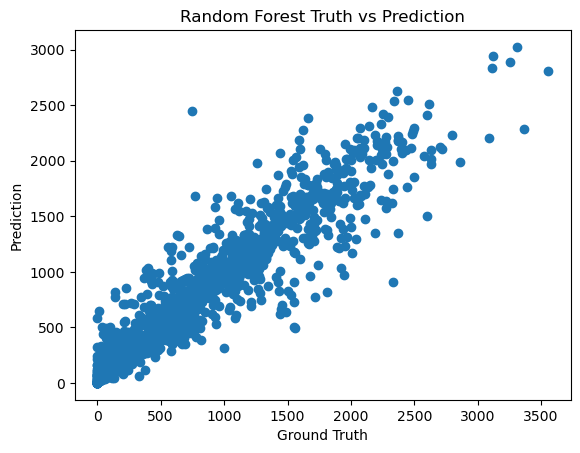

In [386]:
plt.scatter(y_test,y_pred_rfr)
plt.title("Random Forest Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

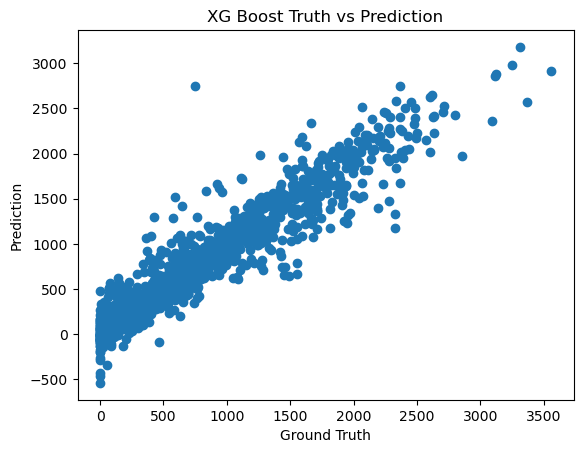

In [387]:
plt.scatter(y_test,y_pred_xgr)
plt.title("XG Boost Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.show()

In [388]:
## hyper parameter tuning for random forest

In [393]:
from sklearn.model_selection import RandomizedSearchCV

#number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start=200, stop=2000, num=10)]

#number of features to consider at every split
max_features = ['log2', 'sqrt']

#maximum number of levels allowed in each DT
max_depth = [int(i) for i in np.linspace(10,120, num=12)]

#minimum number of samples required to split a node
min_samples_split = [2,5,10]

#minimum samples required at each leaf node
min_samples_leaf = [1,2,4]

#method of selecting samples for training each tree
bootstrap = [True, False]

#create a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [394]:
import time
start_time = time.time()

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs= -1, error_score="raise")
rf_random.fit(X_train,y_train)
y_pred_rf_random = rf_random.predict(X_test)

print("time taken to training randomize search: ", time.time() - start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
time taken to training randomize search:  399.8246502876282


In [395]:
get_metrics(y_test, y_pred_rf_random, "RandomForestRegressor Fine Tuning")

RandomForestRegressor Fine Tuning : ['MSE': 42714.193, 'RMSE': 206.674, 'MAE': 124.91, 'R2': 0.866]


In [396]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40,
 'bootstrap': False}

In [398]:
rf_tuned = RandomForestRegressor(n_estimators=1400,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features="log2",
                                 max_depth=40,
                                 bootstrap=False)
rf_tuned.fit(X_train,y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

get_metrics(y_test, y_pred_rf_tuned, "RandomForestRegressor with best Parameters")


RandomForestRegressor with best Parameters : ['MSE': 42858.95, 'RMSE': 207.024, 'MAE': 125.1, 'R2': 0.866]


In [399]:
## hyper parameter tuning for XGBoost Regressor

In [400]:
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

params = {'max_depth': [3,5,6,10,15,20],
          'learning_rate': [0.01, 0.1, 0.2, 0.3],
          'subsample': np.arange(0.5,1.0,0.1),
          'colsample_bytree': np.arange(0.4,1.0,0.1),
          'colsamole_bylevel': np.arange(0.4,1.0,0.1),
          'n_estimators': [100,500,1000]}

xgbr = XGBRegressor(seed=20)
rscv = RandomizedSearchCV(estimator=xgbr,
                          param_distributions=params,
                          scoring='neg_mean_squared_error',
                          n_iter=25,
                          cv=5,
                          verbose=1)

rscv.fit(X_train,y_train)
y_pred_XGB_rscv= rscv.predict(X_test)
get_metrics(y_test, y_pred_XGB_rscv, "XGBRegressor with fine tuning")
print("time taken to training using randomize search :", time.time() - start_time)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor with fine tuning : ['MSE': 35276.672, 'RMSE': 187.821, 'MAE': 112.552, 'R2': 0.892]
time taken to training using randomize search : 331.9860944747925


In [401]:
rscv.best_params_

{'subsample': 0.5,
 'n_estimators': 1000,
 'max_depth': 20,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7,
 'colsamole_bylevel': 0.7}

In [402]:
XGB_tuned= XGBRegressor(subsample = 0.5,
                        n_estimators = 1000,
                        max_depth = 20,
                        learning_rate = 0.01,
                        colsample_bytree = 0.7,
                        colsamole_bylevel = 0.7,
                        seed= 20)
XGB_tuned.fit(X_train,y_train)
y_pred_tuned = XGB_tuned.predict(X_test)
get_metrics(y_test, y_pred_tuned, "XGB with best parameters")

XGB with best parameters : ['MSE': 35276.672, 'RMSE': 187.821, 'MAE': 112.552, 'R2': 0.892]


In [311]:
# save model

In [403]:
import pickle
import os
dir = r"D:\projects\seoul bike sharing demand prediction\Models"
model_file_name = "XGBoost_regressor_r2_0_892_v1.pkl"
model_file_path = os.path.join(dir, model_file_name)
pickle.dump(XGB_tuned, open(model_file_path,'wb'))

In [404]:
X_test[0,:]

array([-0.50839691,  1.1998884 ,  0.52836228,  0.06680005,  0.9210637 ,
        0.14200505, -0.13401915, -0.17102636,  0.22996655, -0.18708879,
       -0.87815509,  1.01127504,  0.30179287, -0.58569899,  1.73073366,
       -0.56834235,  2.53140945, -0.41106465, -0.42003701, -0.40559398,
       -0.41153889, -0.41272349])

In [405]:
X_test[1,:]

array([ 0.07092757,  1.65407403, -0.35217637,  0.3562486 , -1.04340087,
        3.01478263, -0.13401915, -0.17102636,  0.22996655, -0.18708879,
        0.48566198,  0.14070562,  0.30179287, -0.58569899,  1.73073366,
       -0.56834235, -0.39503684, -0.41106465, -0.42003701, -0.40559398,
       -0.41153889, -0.41272349])

In [406]:
y_test

6056    1728
5556     822
5990     658
7674    2716
3319    1083
        ... 
8307     122
100       42
6605     179
1783     294
6013     673
Name: Rented Bike Count, Length: 1752, dtype: int64

In [407]:
# Dump scaling parameters

In [408]:
sc_dump_path = r"D:\projects\seoul bike sharing demand prediction\Models\sc.pkl"

pickle.dump(sc, open(sc_dump_path, "wb"))